In [ ]:
# !pip install konlpy

In [ ]:
from konlpy.tag import Okt
import re  
okt=Okt() 
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()

In [ ]:
import pandas as pd
from math import log # IDF 계산을 위해

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
t = Tokenizer()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers     import Dense
from tensorflow.keras.models     import Sequential
from tensorflow.keras.callbacks  import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from IPython.display import Image

# 선형 회귀 구현하기 (Keras)

In [ ]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트
import numpy as np # Numpy를 임포트

In [ ]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

In [ ]:
model=Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
# sgd는 경사 하강법을 의미.
# 손실 함수(Loss function)은 평균제곱오차 mse를 사용.
model.fit(X,y, batch_size=1, epochs=300, shuffle=False)
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도.

Epoch 1/300
9/9 [==============================] - 1s 1ms/step - loss: 392.6005 - mse: 392.6005
Epoch 2/300
9/9 [==============================] - 0s 1ms/step - loss: 1.8526 - mse: 1.8526
Epoch 3/300
9/9 [==============================] - 0s 1ms/step - loss: 1.8473 - mse: 1.8473
Epoch 4/300
9/9 [==============================] - 0s 1ms/step - loss: 1.8421 - mse: 1.8421
Epoch 5/300
9/9 [==============================] - 0s 1ms/step - loss: 1.8372 - mse: 1.8372
Epoch 6/300
9/9 [==============================] - 0s 1ms/step - loss: 1.8324 - mse: 1.8324
Epoch 7/300
9/9 [==============================] - 0s 1ms/step - loss: 1.8278 - mse: 1.8278
Epoch 8/300
9/9 [==============================] - 0s 1ms/step - loss: 1.8233 - mse: 1.8233
Epoch 9/300
9/9 [==============================] - 0s 1ms/step - loss: 1.8190 - mse: 1.8190
Epoch 10/300
9/9 [==============================] - 0s 1ms/step - loss: 1.8149 - mse: 1.8149
Epoch 11/300
9/9 [==============================] - 0s 1ms/step - loss: 1.8

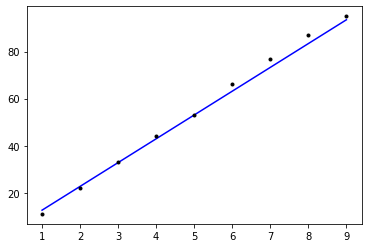

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [ ]:
print(model.predict([9.5]))

[[98.556465]]


# 선형 회귀 구현하기 (Tape 버전)

### 자동 미분 설명하기

In [ ]:
import tensorflow as tf

tape_gradient() 메서드는 자동 미분 기능을 수행.  
자동 미분 실습-> 임의로 2w^2+5라는 식을 세워보고, w에 대해 미분.

In [ ]:
w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

이제 gradients를 출력하면 w가 속한 수식을 w로 미분한 값이 저장된 것을 확인.

In [ ]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


### Tape로 선형 회귀 구현하기

In [ ]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

In [ ]:
# 훈련할 가중치 변수를 선언
W = tf.Variable(4.0)
b = tf.Variable(1.0)

In [ ]:
@tf.function
def hypothesis(x):
  return W*x + b

In [ ]:
# 테스트를 위한 입력값을 준비.
x_test = [3.5, 5, 5.5, 6]
# 테스트 데이터를 이용해 학습된 선형회귀 모델이 데이터의 경향성(y=10.6x)을 잘 학습했는지 측정.

print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [ ]:
# 손실 함수를 정의.
# MSE 손실함수 \mean{(y' - y)^2}
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취함.
  return tf.reduce_mean(tf.square(y_pred - y))

In [ ]:
optimizer = tf.optimizers.SGD(0.01)

for i in range(301): # W, b update  # Gradient descent
  with tf.GradientTape() as tape:
    y_pred = hypothesis(X)
    cost = mse_loss(y_pred, y)

  gradients = tape.gradient(cost, [W, b])
  optimizer.apply_gradients(zip(gradients, [W, b]))

  if i % 10 == 0:
    print("epoch : {:3} | W의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, W.numpy(), b.numpy(), cost))

epoch :   0 | W의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | W의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | W의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328163
epoch :  30 | W의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306966
epoch :  40 | W의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | W의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | W의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252897
epoch :  70 | W의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | W의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223597
epoch :  90 | W의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | W의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | W의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | W의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | W의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | W의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | W의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [ ]:
# 테스트를 위한 입력값을 준비합니다.
x_test = [3.5, 5, 5.5, 6, 9.5]
# 테스트 데이터를 이용해 학습된 선형회귀 모델이 데이터의 경향성(y=10.6x)을 잘 학습했는지 측정합니다.

print(hypothesis(x_test).numpy())

[ 38.35479   54.295143  59.608593  64.92204  102.1162  ]


# 로지스틱 회귀 구현하기

In [ ]:
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용

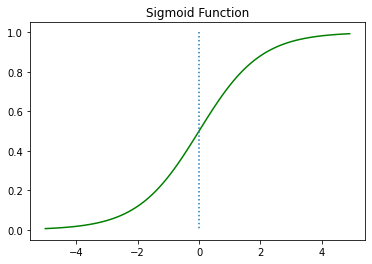

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

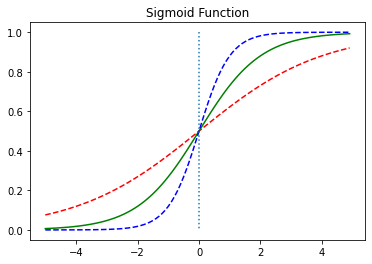

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

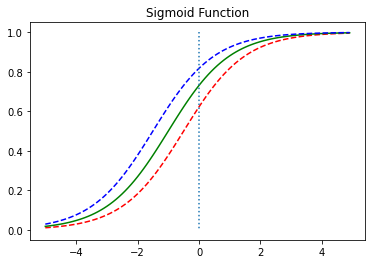

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

# X의 입력이 10부터 y의 출력이 1이 되도록 설계된 데이터
X = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

model = Sequential()

# Dense의 첫번째 인자는 항상 출력의 차원을 의미.
# activation function은 출력값에 적용할 함수를 의미.
model.add(Dense(1, input_dim=1, activation='sigmoid'))

# sgs는 경사하강법을 의미. lr은 learning rate의 값.
sgd = optimizers.SGD(lr=0.01)

# 이진 분류를 위해 activation function으로 sigmoid 함수를 사용한다면
# loss는 binary_crossentropy를 사용. (암기하듯이 기억해도 무방함.)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(X,y, batch_size=1, epochs=200, shuffle=False)

Epoch 1/200
13/13 [==============================] - 0s 2ms/step - loss: 5.7468 - binary_accuracy: 0.7199 
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1463 - binary_accuracy: 0.9526
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1424 - binary_accuracy: 0.9526
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1400 - binary_accuracy: 0.9526
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1382 - binary_accuracy: 0.9526
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1367 - binary_accuracy: 0.9526
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1353 - binary_accuracy: 0.9526
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1341 - binary_accuracy: 0.9526
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1328 - binary_accuracy: 0.9526
Epoch 10/200
13/13 [=========================

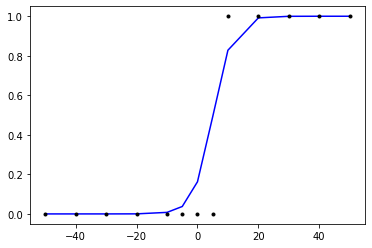

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [ ]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.20940128]
 [0.26770684]
 [0.3353605 ]
 [0.41052654]
 [0.45000163]]
[[0.8692062 ]
 [0.99403846]
 [0.99976104]
 [0.99999046]
 [1.        ]]


# 다중 선형 회귀 구현하기

중간 고사, 기말 고사, 그리고 추가 점수를 어떤 공식을 통해 최종 점수를 계산한 데이터가 있고, 그 규칙을 찾고싶다면 이제는 더 이상 독립 변수가 1개가 아님.

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

In [ ]:
# 입력 벡터의 차원은 3입니다. 즉, input_dim은 3.
X = np.array([[70,85,11],[71,89,18],[50,80,20],[99,20,10],[50,10,10]]) # 중간, 기말, 가산점
# 출력 벡터의 차원은 1. 즉, output_dim은 1.
y = np.array([73,82,72,57,34]) # 최종 성적

model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))
sgd = optimizers.SGD(lr=0.00001)

model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
model.fit(X,y, batch_size=1, epochs=500, shuffle=False)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 6783.0042 - mse: 6783.0042
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 949.0703 - mse: 949.0703
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 500.4224 - mse: 500.4224
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 505.3314 - mse: 505.3314
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 479.3476 - mse: 479.3476
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 425.0974 - mse: 425.0974
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 365.8779 - mse: 365.8779
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 311.6009 - mse: 311.6009
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 264.8895 - mse: 264.8895
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 225.6612 - mse: 225.6612
Epoch 11/500
5/5 [===================

# 다중 로지스틱 회귀 구현하기

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

In [ ]:
# 입력 벡터의 차원은 2. 즉, input_dim은 2.
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# 출력 벡터의 차원은 1. 즉, output_dim은 1.
y = np.array([0, 1, 1, 1])

model=Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(optimizer='sgd' ,loss='binary_crossentropy',metrics=['binary_accuracy'])
model.fit(X,y, batch_size=1, epochs=800, shuffle=False)

Epoch 1/800
4/4 [==============================] - 0s 3ms/step - loss: 0.7374 - binary_accuracy: 0.7333
Epoch 2/800
4/4 [==============================] - 0s 2ms/step - loss: 0.7335 - binary_accuracy: 0.2667
Epoch 3/800
4/4 [==============================] - 0s 2ms/step - loss: 0.7298 - binary_accuracy: 0.2667
Epoch 4/800
4/4 [==============================] - 0s 2ms/step - loss: 0.7261 - binary_accuracy: 0.2667
Epoch 5/800
4/4 [==============================] - 0s 2ms/step - loss: 0.7226 - binary_accuracy: 0.2667
Epoch 6/800
4/4 [==============================] - 0s 2ms/step - loss: 0.7191 - binary_accuracy: 0.2667
Epoch 7/800
4/4 [==============================] - 0s 2ms/step - loss: 0.7158 - binary_accuracy: 0.2667
Epoch 8/800
4/4 [==============================] - 0s 2ms/step - loss: 0.7126 - binary_accuracy: 0.2667
Epoch 9/800
4/4 [==============================] - 0s 2ms/step - loss: 0.7095 - binary_accuracy: 0.2667
Epoch 10/800
4/4 [==============================] - 0s 2ms/step 